# Autoencoder in Fraud - classification

https://www.analyticsvidhya.com/blog/2021/05/anomaly-detection-using-autoencoders-a-walk-through-in-python/

https://towardsdatascience.com/anomaly-detection-with-autoencoder-b4cdce4866a6

https://machinelearningmastery.com/autoencoder-for-classification/

https://towardsdatascience.com/extreme-rare-event-classification-using-autoencoders-in-keras-a565b386f098

In [1]:

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
from tensorflow.python.keras.layers import LayerNormalization
from keras.layers import LSTM, Dense,Flatten, Dropout, Activation, Conv1D, Conv2D, ReLU , CategoryEncoding 
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.utils import resample
from keras import optimizers
from sklearn.model_selection import train_test_split
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import imblearn
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
#from autokeras import StructuredDataClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler







/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<img src='https://406167-1278791-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2021/04/What-is-an-Outlier.jpg' >


## import the data

In [2]:




path= 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

#Importing traing data


dataset = pd.read_csv(path,header=None)



# last column is the target
# 0 = anomaly, 1 = normal
TARGET = 140

xx1= 8
xx2= 3

xx1 = dataset[xx1]
xx2 = dataset[xx2]

X = dataset.drop(TARGET, axis=1)
y = dataset[TARGET]

dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
y.shape

(4998,)

In [ ]:
y.dtypes

dtype('float64')

## plot the data

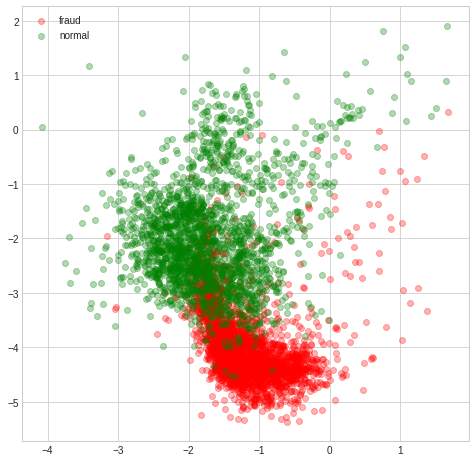

In [4]:

plt.figure(figsize=(8, 8))

plt.scatter(xx1[y==1], xx2[y==1] , c="red", cmap="plasma",alpha=0.3, label='fraud')
plt.scatter(xx1[y==0], xx2[y==0] , c='green', cmap="plasma",alpha=0.3, label='normal')
plt.legend()
plt.show()

## one hot encoding the target to 1 or 0

In [ ]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

# integer encode
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)
#print(y_encoded)


#y_pd=pd.DataFrame(y_encoded)
#y_pd

In [5]:

# scaling and standardizing

scaler = preprocessing.StandardScaler().fit(X)


X_scaled = scaler.transform(X)
X_scaled


array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.41209124,
         0.77172417,  0.63616554],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.76190873,
         0.87786548, -0.51593741],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.51840757,
         0.76022193,  0.2013596 ],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -1.20017695,
        -0.83057384, -0.77902953],
       [-0.24750005, -0.16584826, -0.25041586, ...,  1.0241232 ,
         0.89470289,  1.06875185],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.86987066,
        -0.59541889,  0.01558609]])

In [6]:



# Split the data up in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


In [30]:
X_train.shape[0]

3498

In [31]:
X_test.shape[0]

1500

## setting early stopping

In [12]:
# define callbacks early stopping
DESIRED_ACCURACY = 0.9999999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= DESIRED_ACCURACY):
      print("\nReached 99.7% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [13]:
earlystop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [15]:
#get the number of inputs or columns
X_train.shape[1]
#X_train.shape

140

## training the keras model

In [43]:



# In[33]:


#counts, bins = np.histogram(yo)
#plt.hist(bins[:-1], bins, weights=counts)


# ## Training the model 

# In[36]:
from tensorflow.keras.layers.experimental import preprocessing
from keras.regularizers import l2

#optionnaly set the regulation L1 or L2
#keras.regularizers.l1_l2(l1=0.01, l2=0.01)

input_dim = X_train.shape[1]

# Initialize the NN 
model = Sequential()

# Add input layer 
model.add(Dense(input_dim,   input_shape=[X_train.shape[1]] , activation='relu',   kernel_initializer='he_uniform'))

model.add(Dropout(0.1))
#hidden layer
#model.add(ReLU())
model.add(Dense(32,  activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
#model.add(LayerNormalization())
model.add(BatchNormalization(momentum=0.99))

#initializer = tf.keras.initializers.he_uniform
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

#model.add(Dense(4,  activation='relu',kernel_initializer=initializer,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))




model.add(Dense(32,  activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64,  activation='relu', kernel_initializer='he_uniform'))

#model.add(Dense(64,  activation='relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.1))
model.add(Dropout(0.1))
model.add(BatchNormalization(momentum=0.99))
#model.add(ReLU())
# Add output layer 
model.add(Dense(input_dim, activation='linear'))

#model.add(Dense(1, activation='sigmoid'))
#encoder = preprocessing.CategoryEncoding()

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


model.compile(metrics='accuracy',
              loss='mse',
              optimizer=opt)

#tf.keras.models.Model(encoder)
model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 140)               19740     
_________________________________________________________________
dropout_12 (Dropout)         (None, 140)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4512      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)               

In [44]:

#train the model with shuffeling
history=model.fit(X_train, y_train,
                  validation_split=0.1,epochs=30, 
                  batch_size=48, verbose=1, 
                  shuffle=True
                  #, callbacks=[callbacks]
                  
                  )





# ## Evaluating the model



#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)




Epoch 1/30
66/66 [==============================] - 2s 10ms/step - loss: 0.9093 - accuracy: 0.0019 - val_loss: 0.4720 - val_accuracy: 0.0000e+00
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.0064 - val_loss: 0.1090 - val_accuracy: 0.0000e+00
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.0045 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.0030 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.0020 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.0015 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.0038 - val_loss: 0.0084 - val_accuracy: 0.

In [45]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


47/47 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.0287
[0.008678190410137177, 0.02866666577756405]


## plot accuracy vs. loss curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


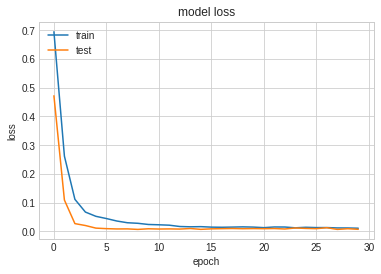

In [46]:
# list all data in history
print(history.history.keys())


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## plot the reconstruction error

<Figure size 576x576 with 0 Axes>

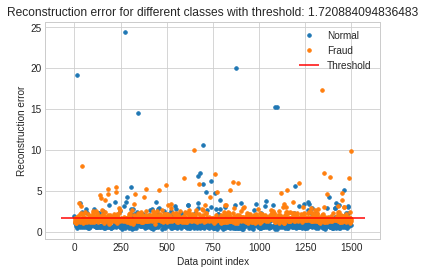

In [64]:
test_x_predictions = model.predict(X_test)
mse = np.mean(np.power(X_test - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df_test = error_df_test.reset_index()

#calc threshold by the std. deviation
threshold_fixed = np.std(np.mean((X_test - test_x_predictions), axis=1))*3

groups = error_df_test.groupby('True_class')

plt.figure(figsize=(8, 8))

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()

plt.title("Reconstruction error for different classes"+ " with threshold: "+str(threshold_fixed))
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [59]:
threshold_fixed

1.720884094836483